# Praktikum 1 - Iris Classification with Perceptron

### Step 1 - Importing Libraries

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

### Step 2 - Load Data & Visualization

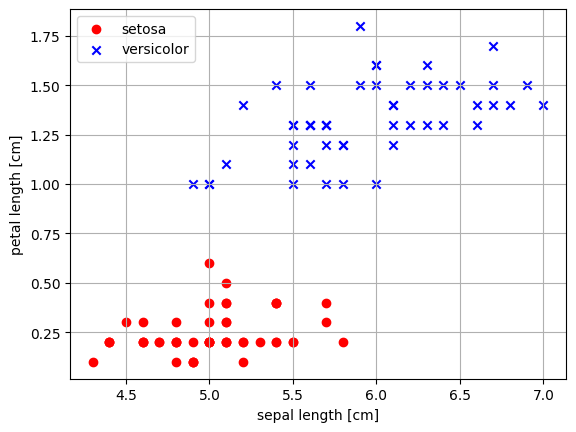

In [3]:
df = pd.read_csv('./iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3

plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Step 3 - Perceptron Class

In [11]:
class Perceptron(object):
	def __init__(self, eta=0.01, n_iter=10):
		self.eta = eta
		self.n_iter = n_iter
		
	def fit(self, X, y):
		self.w_ = np.zeros(1 + X.shape[1]) # 1 + X.shape[1] = 1 + 4 = 5
		self.errors_ = []
		
		for _ in range(self.n_iter):
			errors = 0
			for xi, target in zip(X, y):
				update = self.eta * (target-self.predict(xi))
				self.w_[0] += update
				self.w_[1:] += update * xi
				errors += int(update !=0.0)
			self.errors_.append(errors)
		return self
	
	def net_input(self, X):
		return np.dot(X, self.w_[1:]) + self.w_[0]
	
	def predict(self, X):
		return np.where(self.net_input(X) >= 0.0, 1, -1)

### Step 4 - Data Selection & Encoding Level

In [12]:
y = df.iloc[0:100, 4].values # 100 Data Awal
y = np.where(y == 'Iris-setosa', -1, 1) # Ganti encoding label
X = df.iloc[0:100, [0, 3]].values # Slice data latih

### Step 5 : Fitting Model

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Step 6 - Error Value Visualization per Epoch

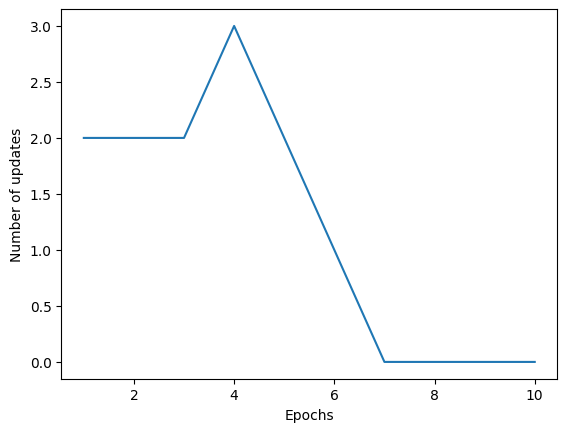

In [14]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Step 7 - Boundary Decision Visualization

In [18]:
def plot_decision_region(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') # 5
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 5
    cmap = ListedColormap(colors[:len(np.unique(y))]) # 3
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1 # 4.3, 7.9
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1 # 0, 5.4
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # 4.3 - 7.9
						   np.arange(x2_min, x2_max, resolution)) # 0 - 5.4
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # 2
    z = z.reshape(xx1.shape) # 2
    
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap) # 2
    plt.xlim(xx1.min(), xx1.max()) # 4.3, 7.9
    plt.ylim(xx2.min(), xx2.max()) # 0, 5.4
    
    for i, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], marker=markers[i], label=c1)

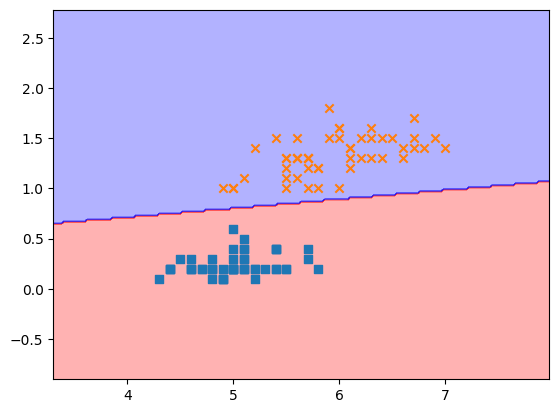

In [19]:
plot_decision_region(X, y, classifier=ppn)